### Import the needed libraries

In [704]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Create a Connection to the Database

In [705]:
accident_data = sqlite3.connect('accident_data_v1.0.0_2023.db')

### Create a Database Cursor

In [706]:
acd = accident_data.cursor()

### Dislay the tables in the Database

In [707]:
res = acd.execute("SELECT name FROM sqlite_master")
res.fetchall()

[('accident',),
 ('sqlite_autoindex_accident_1',),
 ('casualty',),
 ('sqlite_autoindex_casualty_1',),
 ('vehicle',),
 ('sqlite_autoindex_vehicle_1',),
 ('lsoa',),
 ('sqlite_autoindex_lsoa_1',)]

### Display the columns of the various Tables in the Database, Making Primary and Foreign Keys Visible

In [708]:
ret = acd.execute(f"PRAGMA table_info(accident)")
accident_info = ret.fetchall()
accident_info

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [709]:
ret = acd.execute(f"PRAGMA table_info(casualty)")
casualty_info = ret.fetchall()
casualty_info

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [710]:
ret = acd.execute(f"PRAGMA table_info(vehicle)")
vehicle_info = ret.fetchall()
vehicle_info

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [711]:
ret = acd.execute(f"PRAGMA table_info(lsoa)")
lsoa_info = ret.fetchall()
lsoa_info

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

### Finding The Oldest Driver/Rider in the Casualty Table

### Importing the Road Safety Guide to Find the code for Driver/Rider

In [712]:
accident_guide = pd.read_excel("Road-Safety-Open-Dataset-Data-Guide (1).xlsx")

#Filter for 'casualty' in the dataframe
accident_guide[accident_guide['field name'].str.contains('casualty', regex = False)]

,table,field name,code/format,label,note
1470,Casualty,casualty_reference,NaN,NaN,unique value for each casualty in a singular a...
1471,Casualty,casualty_class,1,Driver or rider,NaN
1472,Casualty,casualty_class,2,Passenger,NaN
1473,Casualty,casualty_class,3,Pedestrian,NaN
1474,Casualty,sex_of_casualty,1,Male,NaN
...,...,...,...,...,...
1576,Casualty,casualty_home_area_type,1,Urban area,field introduced in 1999
1577,Casualty,casualty_home_area_type,2,Small town,field introduced in 1999
1578,Casualty,casualty_home_area_type,3,Rural,field introduced in 1999
1579,Casualty,casualty_home_area_type,-1,Data missing or out of range,field introduced in 1999


In [713]:
#Filter out the casualty class guide
casualty_class_guide = accident_guide[accident_guide['field name'] == 'casualty_class']
casualty_class_guide

,table,field name,code/format,label,note
1471,Casualty,casualty_class,1,Driver or rider,NaN
1472,Casualty,casualty_class,2,Passenger,NaN
1473,Casualty,casualty_class,3,Pedestrian,NaN


### Run SQL Querry to filter the oldest Driver (casualty class of 1)

In [714]:
res = acd.execute("""SELECT MAX(age_of_casualty) FROM casualty 
                  WHERE casualty_class ==1""")
res.fetchall()

[(101,)]

In [715]:
#Same as above using Pandas SQl

oldest_driver = pd.read_sql_query("""SELECT MAX(age_of_casualty) as Oldest_Driver 
                                  FROM casualty WHERE casualty_class ==1""", accident_data)
oldest_driver

,Oldest_Driver
0,101


### The Total Number of Vehicle_type = 19 Vehicles in the Vehicle Table

In [716]:
res = acd.execute("SELECT COUNT(vehicle_type) FROM vehicle WHERE vehicle_type ==19")
res.fetchall()

[(47458,)]

In [717]:
#Same as above using Pandas SQl
total_vehicle_type = pd.read_sql_query("""SELECT COUNT(vehicle_type) as 'Vehicle Type Count'
                                       FROM vehicle WHERE vehicle_type ==19""", accident_data)
total_vehicle_type

,Vehicle Type Count
0,47458


### Sex of driver, Sex of casualty, Speed limit and Age of vehicle for Accidents in Hull

In [718]:
#View Lsoa Table to find basis of connection to the accident table
acc_lsoa = pd.read_sql_query("SELECT * FROM lsoa", accident_data)
acc_lsoa[acc_lsoa['lsoa01nmw'].str.contains('Hull', regex = False)]


,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
12755,12756,E01012756,Kingston upon Hull 025A,Kingston upon Hull 025A,198940.919128,3498.355895,6f44ac4a-9449-4c64-8564-6f612bf9a060
12756,12757,E01012757,Kingston upon Hull 025B,Kingston upon Hull 025B,318087.393494,3716.587517,e1c0a075-7ca8-425e-8437-39db56a6b994
12757,12758,E01012758,Kingston upon Hull 018A,Kingston upon Hull 018A,311920.258041,3775.303823,a049347f-f7fb-481f-90ca-a95e632ac97a
12758,12759,E01012759,Kingston upon Hull 025C,Kingston upon Hull 025C,398188.211227,3984.807880,f55da506-35c7-4db5-a007-bba4255d50e3
12759,12760,E01012760,Kingston upon Hull 025D,Kingston upon Hull 025D,125999.228485,2082.915305,dc1e40d1-79fe-4cda-b204-d22f9362b043
...,...,...,...,...,...,...,...
12913,12914,E01012914,Kingston upon Hull 012C,Kingston upon Hull 012C,710303.255646,5041.700669,cffb08e3-6c6b-4a4b-9ae2-33c7558359e5
12914,12915,E01012915,Kingston upon Hull 008E,Kingston upon Hull 008E,262494.227234,3192.736490,ae097b6b-47d1-4b41-8743-8a78aeb6e408
12915,12916,E01012916,Kingston upon Hull 012D,Kingston upon Hull 012D,546988.155197,3973.545932,f238c3d8-e0f7-4648-81f9-1c407b46a7ca
12916,12917,E01012917,Kingston upon Hull 008F,Kingston upon Hull 008F,400908.828018,3816.251453,644cfeaf-d9c6-4e49-b64e-31220ee8d4ed


In [719]:
# Join all four tables together
lsoa_tables_join = pd.read_sql_query("""SELECT* 
FROM accident
INNER JOIN lsoa ON accident.lsoa_of_accident_location = lsoa.lsoa01cd
INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
INNER JOIN casualty ON accident.accident_index = casualty.accident_index""", accident_data)

In [720]:
#View Joined Table
lsoa_tables_join

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,1,0,0,0,0,0,2,-1,-1
3,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,3,0,0,1,0,0,9,1,2
4,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,4,2,0,0,0,0,0,2,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047102,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,8,3,0,0,0,0,0,9,3,7
1047103,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,7,3,0,0,1,0,0,9,3,7
1047104,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,3,3,0,0,2,0,0,9,3,7
1047105,202063DF01620,2020,63DF01620,324280.0,259980.0,-3.110141,52.232798,63,1,4,...,1,3,0,0,2,0,0,9,3,7


In [721]:
#Filter accident in the regions of Kingston Upon Hull
hull_table = lsoa_tables_join[lsoa_tables_join['lsoa01nmw'].str.contains('Kingston upon Hull', regex = False)]
hull_table 

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
118900,2017160143153,2017,160143153,506049.0,428825.0,-0.393435,53.745044,16,3,2,...,7,3,0,0,0,0,0,9,1,9
118901,2017160143153,2017,160143153,506049.0,428825.0,-0.393435,53.745044,16,3,2,...,7,3,0,0,0,0,0,9,1,9
118908,2017160143188,2017,160143188,508597.0,428665.0,-0.354873,53.743082,16,3,2,...,8,3,0,0,1,0,0,9,1,1
118909,2017160143188,2017,160143188,508597.0,428665.0,-0.354873,53.743082,16,3,2,...,8,3,0,0,0,0,0,9,1,1
118910,2017160143188,2017,160143188,508597.0,428665.0,-0.354873,53.743082,16,3,2,...,8,3,0,0,1,0,0,9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932629,2020161013730,2020,161013730,509222.0,432955.0,-0.343885,53.781494,16,3,2,...,4,3,0,0,0,0,0,1,1,3
932630,2020161013730,2020,161013730,509222.0,432955.0,-0.343885,53.781494,16,3,2,...,4,3,0,0,0,0,0,1,1,3
932635,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,3,3,5,1,0,0,0,0,1,1
932640,2020161014949,2020,161014949,509443.0,428632.0,-0.342063,53.742609,16,3,2,...,5,3,0,0,0,0,0,9,1,1


In [722]:
# Show Sex of driver, Sex of casualty, Speed limit and Age of vehicle for Accidents in Hull
hull_table[['lsoa01nmw', 'sex_of_casualty','sex_of_driver', 'speed_limit','age_of_vehicle']]

,lsoa01nmw,sex_of_casualty,sex_of_driver,speed_limit,age_of_vehicle
118900,Kingston upon Hull 028C,1,1,30,13
118901,Kingston upon Hull 028C,1,1,30,9
118908,Kingston upon Hull 029A,2,3,30,6
118909,Kingston upon Hull 029A,1,3,30,6
118910,Kingston upon Hull 029A,2,1,30,11
...,...,...,...,...,...
932629,Kingston upon Hull 006E,1,1,30,-1
932630,Kingston upon Hull 006E,1,1,30,-1
932635,Kingston upon Hull 007C,1,1,30,-1
932640,Kingston upon Hull 029C,1,3,30,-1


### Create Accident Dataframe

In [723]:
accident_df = pd.read_sql_query('SELECT* FROM accident WHERE accident_year==2020', accident_data)

In [724]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [725]:
#Find and Remove/Replace Missing Values
accident_df.isna().sum()


accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [726]:
#Drop Columns with NA as they make up less than
accident_df_drop = accident_df.dropna()
accident_df_drop.isna().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

In [727]:
accident_guide['label'].str.contains('Data missing or out of range')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1576    False
1577    False
1578    False
1579     True
1580      NaN
Name: label, Length: 1581, dtype: object

In [728]:
#Visualize missing values coded as -1
accident_df_drop.isin([-1, "-1"]).sum().to_frame("Missing Values")

,Missing Values
accident_index,0
accident_year,0
accident_reference,0
location_easting_osgr,0
location_northing_osgr,0
longitude,0
latitude,0
police_force,0
accident_severity,0
number_of_vehicles,0


In [729]:
vehicle_df = pd.read_sql_query('SELECT* FROM vehicle WHERE accident_year==2020', accident_data)


In [730]:
vehicle_df.isin([-1, "-1"]).sum().to_frame("Missing Values")

,Missing Values
vehicle_index,0
accident_index,0
accident_year,0
accident_reference,0
vehicle_reference,0
vehicle_type,0
towing_and_articulation,689
vehicle_manoeuvre,679
vehicle_direction_from,1640
vehicle_direction_to,1653


In [731]:
casualty_df = pd.read_sql_query('SELECT* FROM casualty WHERE accident_year==2020', accident_data)

In [732]:
casualty_df.isin([-1, "-1"]).sum().to_frame("Missing Values")

,Missing Values
casualty_index,0
accident_index,0
accident_year,0
accident_reference,0
vehicle_reference,0
casualty_reference,0
casualty_class,0
sex_of_casualty,756
age_of_casualty,2481
age_band_of_casualty,2481


### Replace missing value with nan

In [733]:
# replace -1 with np.nan where there is numeric encoding and also for string in the accident df
accident_df.replace(-1, value=np.nan, inplace=True)
vehicle_df.replace(-1, value=np.nan, inplace=True)
casualty_df.replace(-1, value=np.nan, inplace=True)
accident_df.replace("-1", value=np.nan, inplace=True)

In [734]:
#accident_df['local_authority_district'].isna().sum()
accident_df['local_authority_district'] = accident_df['local_authority_district'].fillna(accident_df['local_authority_district'].mode()[0])
#accident_df['local_authority_district'].isna().sum()
accident_df['speed_limit'] = accident_df['speed_limit'].fillna(accident_df['speed_limit'].mode()[0])
accident_df['junction_detail'] = accident_df['junction_detail'].fillna(accident_df['junction_detail'].mode()[0])
accident_df['second_road_class'] = accident_df['second_road_class'].fillna(accident_df['second_road_class'].mode()[0])
accident_df['pedestrian_crossing_human_control'] = accident_df['pedestrian_crossing_human_control'].fillna(accident_df['pedestrian_crossing_human_control'].mode()[0])
accident_df['pedestrian_crossing_physical_facilities'] = accident_df['pedestrian_crossing_physical_facilities'].fillna(accident_df['pedestrian_crossing_physical_facilities'].mode()[0])
accident_df['light_conditions'] = accident_df['light_conditions'].fillna(accident_df['light_conditions'].mode()[0])
accident_df['weather_conditions'] = accident_df['weather_conditions'].fillna(accident_df['weather_conditions'].mode()[0])
accident_df['road_surface_conditions'] = accident_df['road_surface_conditions'].fillna(accident_df['road_surface_conditions'].mode()[0])
accident_df['special_conditions_at_site'] = accident_df['special_conditions_at_site'].fillna(accident_df['special_conditions_at_site'].mode()[0])
accident_df['carriageway_hazards'] = accident_df['carriageway_hazards'].fillna(accident_df['carriageway_hazards'].mode()[0])
accident_df['did_police_officer_attend_scene_of_accident'] = accident_df['did_police_officer_attend_scene_of_accident'].fillna(accident_df['did_police_officer_attend_scene_of_accident'].mode()[0])
accident_df['longitude'] = accident_df['longitude'].fillna(long_lat_df['longitude'].mode()[0])
accident_df['latitude'] = accident_df['latitude'].fillna(long_lat_df['latitude'].mode()[0])

In [735]:
#vehicle_df['age_band_of_driver'].
vehicle_df['age_band_of_driver'] = vehicle_df['age_band_of_driver'].fillna(vehicle_df['age_band_of_driver'].mode()[0])
vehicle_df['towing_and_articulation'] = vehicle_df['towing_and_articulation'].fillna(vehicle_df['towing_and_articulation'].mode()[0])
vehicle_df['vehicle_manoeuvre'] = vehicle_df['vehicle_manoeuvre'].fillna(vehicle_df['vehicle_manoeuvre'].mode()[0])
vehicle_df['vehicle_location_restricted_lane'] = vehicle_df['vehicle_location_restricted_lane'].fillna(vehicle_df['vehicle_location_restricted_lane'].mode()[0])
vehicle_df['junction_location'] = vehicle_df['junction_location'].fillna(vehicle_df['junction_location'].mode()[0])
vehicle_df['skidding_and_overturning'] = vehicle_df['skidding_and_overturning'].fillna(vehicle_df['skidding_and_overturning'].mode()[0])
vehicle_df['hit_object_in_carriageway'] = vehicle_df['hit_object_in_carriageway'].fillna(vehicle_df['hit_object_in_carriageway'].mode()[0])
vehicle_df['first_point_of_impact'] = vehicle_df['first_point_of_impact'].fillna(vehicle_df['first_point_of_impact'].mode()[0])
vehicle_df['vehicle_left_hand_drive'] = vehicle_df['vehicle_left_hand_drive'].fillna(vehicle_df['vehicle_left_hand_drive'].mode()[0])
vehicle_df['journey_purpose_of_driver'] = vehicle_df['journey_purpose_of_driver'].fillna(vehicle_df['journey_purpose_of_driver'].mode()[0])
vehicle_df['sex_of_driver'] = vehicle_df['sex_of_driver'].fillna(vehicle_df['sex_of_driver'].mode()[0])
vehicle_df['age_of_driver'] = vehicle_df['age_of_driver'].fillna(vehicle_df['age_of_driver'].mean())
vehicle_df['age_of_vehicle'] = vehicle_df['age_of_vehicle'].fillna(vehicle_df['age_of_vehicle'].mean())

In [736]:
#Casualty Data Cleaning
casualty_df['age_of_casualty'] = casualty_df['age_of_casualty'].fillna(casualty_df['age_of_casualty'].mean())
casualty_df['age_band_of_casualty'] = casualty_df['age_band_of_casualty'].fillna(casualty_df['age_band_of_casualty'].mean())
casualty_df['pedestrian_location'] = casualty_df['pedestrian_location'].fillna(casualty_df['pedestrian_location'].mode()[0])
casualty_df['pedestrian_movement'] = casualty_df['pedestrian_movement'].fillna(casualty_df['pedestrian_movement'].mode()[0])
casualty_df['car_passenger'] = casualty_df['car_passenger'].fillna(casualty_df['car_passenger'].mode()[0])
casualty_df['bus_or_coach_passenger'] = casualty_df['bus_or_coach_passenger'].fillna(casualty_df['bus_or_coach_passenger'].mode()[0])
casualty_df['pedestrian_road_maintenance_worker'] = casualty_df['pedestrian_road_maintenance_worker'].fillna(casualty_df['pedestrian_road_maintenance_worker'].mode()[0])
casualty_df['sex_of_casualty'] = casualty_df['sex_of_casualty'].fillna(method = 'ffill')

### Day of the week Guide

In [737]:
#Filter out day of the week guide
weekday_guide = accident_guide[accident_guide['field name'] == 'day_of_week']
weekday_guide

,table,field name,code/format,label,note
65,Accident,day_of_week,1,Sunday,NaN
66,Accident,day_of_week,2,Monday,NaN
67,Accident,day_of_week,3,Tuesday,NaN
68,Accident,day_of_week,4,Wednesday,NaN
69,Accident,day_of_week,5,Thursday,NaN
70,Accident,day_of_week,6,Friday,NaN
71,Accident,day_of_week,7,Saturday,NaN


### Day Most Accident Occur Chart

Text(0, 0.5, 'Accident Count')

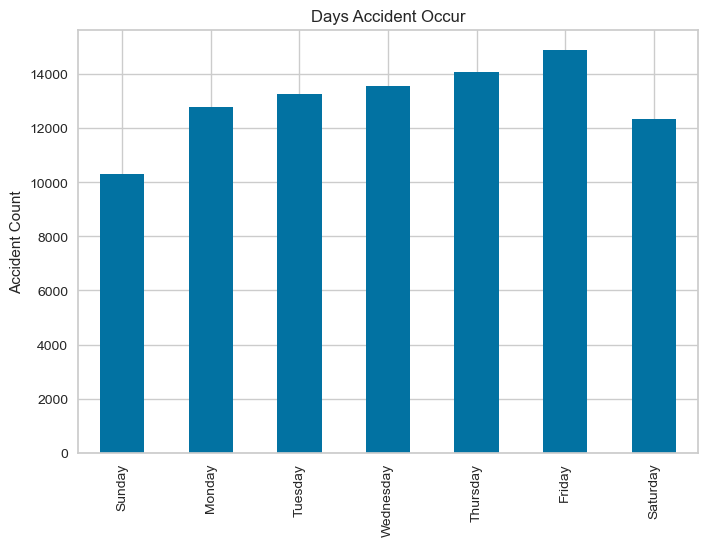

In [738]:
#sns.histplot(accident_df.iloc[:,[12]], stat='count')


weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax = accident_df['day_of_week'].value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels(weekdays)
ax.set_title("Days Accident Occur")
ax.set_ylabel("Accident Count")

In [739]:
#accident_df.iloc[:,[13]]
accident_df['time']

0        09:00
1        13:55
2        01:25
3        01:50
4        02:25
         ...  
91194    14:30
91195    15:05
91196    12:42
91197    14:00
91198    13:50
Name: time, Length: 91199, dtype: object

In [740]:
#accident_df['time']
#accident_df_copy = accident_df

# combine them as strings
new_df = pd.to_datetime(accident_df.date.astype(str) + ' ' +accident_df.time.astype(str))
# add column to dataframe
accident_df.insert(36, 'datetime', new_df)
accident_df['datetime']
#accident_df_copy = accident_df
#accident_df_copy['time']
#accident_df_copy['time'] = pd.to_datetime(accident_df_copy['time'], format='%H:%M')

0       2020-04-02 09:00:00
1       2020-04-27 13:55:00
2       2020-01-01 01:25:00
3       2020-01-01 01:50:00
4       2020-01-01 02:25:00
                ...        
91194   2020-12-08 14:30:00
91195   2020-11-13 15:05:00
91196   2020-04-15 12:42:00
91197   2020-12-15 14:00:00
91198   2020-08-25 13:50:00
Name: datetime, Length: 91199, dtype: datetime64[ns]

In [741]:
accident_df['datetime']

0       2020-04-02 09:00:00
1       2020-04-27 13:55:00
2       2020-01-01 01:25:00
3       2020-01-01 01:50:00
4       2020-01-01 02:25:00
                ...        
91194   2020-12-08 14:30:00
91195   2020-11-13 15:05:00
91196   2020-04-15 12:42:00
91197   2020-12-15 14:00:00
91198   2020-08-25 13:50:00
Name: datetime, Length: 91199, dtype: datetime64[ns]

In [742]:
accident_df["hour"] = accident_df["datetime"].dt.hour

Text(0, 0.5, 'Accidents Count')

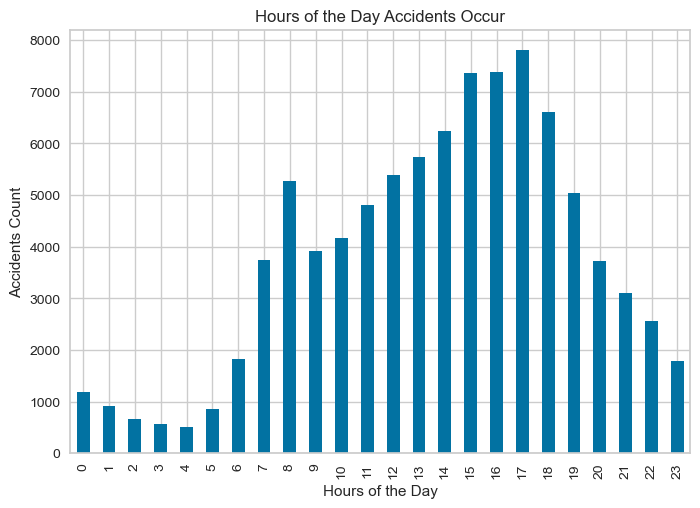

In [743]:
accident_df["hour"].value_counts().sort_index().plot(kind="bar")
plt.title('Hours of the Day Accidents Occur')
plt.xlabel("Hours of the Day")
plt.ylabel('Accidents Count')

### Question 2: Motorbike Accident

In [744]:
#First Join the Accident and Vehicle table
accident_guide[accident_guide['field name'] == 'vehicle_type']
#vehicle_df['vehicle_type']

,table,field name,code/format,label,note
1240,Vehicle,vehicle_type,1,Pedal cycle,NaN
1241,Vehicle,vehicle_type,2,Motorcycle 50cc and under,NaN
1242,Vehicle,vehicle_type,3,Motorcycle 125cc and under,category introduced in 1999 specification
1243,Vehicle,vehicle_type,4,Motorcycle over 125cc and up to 500cc,category introduced in 2005 specification
1244,Vehicle,vehicle_type,5,Motorcycle over 500cc,category introduced in 2005 specification
1245,Vehicle,vehicle_type,8,Taxi/Private hire car,category introduced in 2005 specification
1246,Vehicle,vehicle_type,9,Car,category introduced in 2005 specification
1247,Vehicle,vehicle_type,10,Minibus (8 - 16 passenger seats),category introduced in 1999 specification
1248,Vehicle,vehicle_type,11,Bus or coach (17 or more pass seats),NaN
1249,Vehicle,vehicle_type,16,Ridden horse,category introduced in 1999 specification


In [745]:
av_table = pd.merge(accident_df, vehicle_df, on=['accident_index'])
av_table['datetime']

0        2020-04-02 09:00:00
1        2020-04-27 13:55:00
2        2020-01-01 01:25:00
3        2020-01-01 01:50:00
4        2020-01-01 02:25:00
                 ...        
167370   2020-04-15 12:42:00
167371   2020-04-15 12:42:00
167372   2020-12-15 14:00:00
167373   2020-12-15 14:00:00
167374   2020-08-25 13:50:00
Name: datetime, Length: 167375, dtype: datetime64[ns]

In [746]:
motorcyle_125ccunder = av_table[av_table['vehicle_type'] == 3]
motorcyle_125cc_500cc = av_table[av_table['vehicle_type'] == 4]
motorcyle_500ccOver = av_table[av_table['vehicle_type'] == 5]
all_motorcylcle = av_table.loc[(av_table['vehicle_type'] == 3) | (av_table['vehicle_type'] == 4)\
                                 | (av_table['vehicle_type'] == 5)]

In [747]:
all_motorcylcle['day_of_week']

12        4
33        4
36        4
58        4
77        4
         ..
167195    5
167292    4
167301    2
167304    5
167371    4
Name: day_of_week, Length: 12998, dtype: int64

Text(0, 0.5, 'Motorcycle Accident Count')

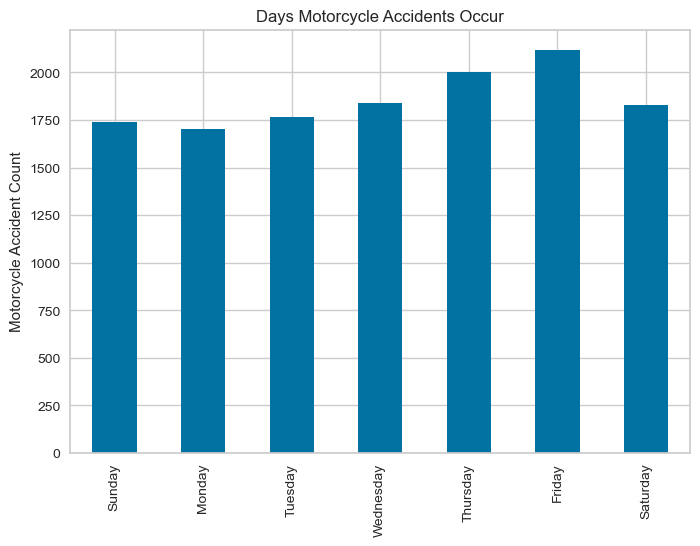

In [748]:

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax = all_motorcylcle['day_of_week'].value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels(weekdays)
ax.set_title("Days Motorcycle Accidents Occur")
ax.set_ylabel("Motorcycle Accident Count")

In [749]:
all_motorcylcle["hour"] = all_motorcylcle["datetime"].dt.hour
all_motorcylcle["hour"]

12         3
33        14
36        14
58        19
77        14
          ..
167195    16
167292    17
167301    17
167304    15
167371    12
Name: hour, Length: 12998, dtype: int64

Text(0, 0.5, 'Motorcycle Accidents Count')

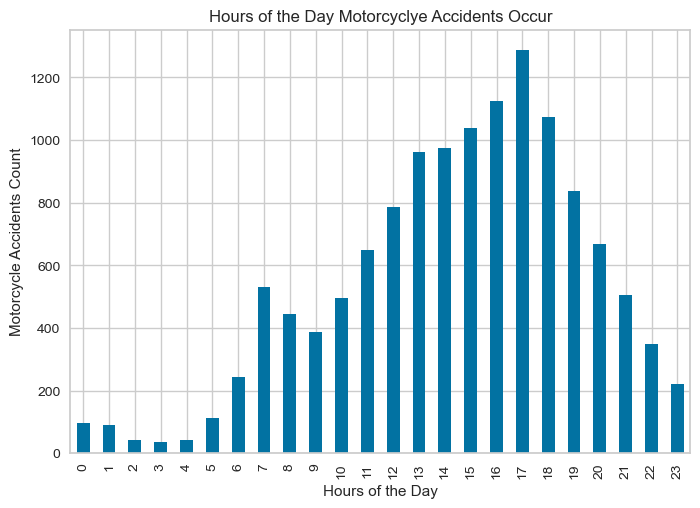

In [750]:
all_motorcylcle["hour"].value_counts().sort_index().plot(kind="bar")
plt.title('Hours of the Day Motorcyclye Accidents Occur')
plt.xlabel("Hours of the Day")
plt.ylabel('Motorcycle Accidents Count')

### No 3: Pedestrians Involved in Accident Time Analysis

In [751]:
avc_table = pd.merge(av_table, casualty_df, on=['accident_index'])
avc_table['casualty_class']

0         3
1         3
2         3
3         3
4         3
         ..
220430    1
220431    1
220432    1
220433    1
220434    3
Name: casualty_class, Length: 220435, dtype: int64

In [752]:
accident_guide[accident_guide['field name'] == 'casualty_class']

,table,field name,code/format,label,note
1471,Casualty,casualty_class,1,Driver or rider,NaN
1472,Casualty,casualty_class,2,Passenger,NaN
1473,Casualty,casualty_class,3,Pedestrian,NaN


In [753]:
#Filter dataframe for pedestrians only
pedestrian_df = avc_table[avc_table['casualty_class'] == 3]
pedestrian_df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6.0,3,9.0,5.0,0.0,0.0,0.0,0,1.0,4.0
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1.0,3,1.0,1.0,0.0,0.0,0.0,0,1.0,2.0
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1.0,3,1.0,1.0,0.0,0.0,0.0,0,1.0,2.0
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,5.0,3,5.0,9.0,0.0,0.0,0.0,0,1.0,3.0
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,8.0,2,4.0,1.0,0.0,0.0,0.0,0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220418,2020991023621,2020,991023621,341791.0,733677.0,-2.946947,56.491558,99,2,1,...,8.0,2,8.0,1.0,0.0,0.0,0.0,0,1.0,4.0
220419,2020991023880,2020,991023880,342979.0,731116.0,-2.927095,56.468699,99,3,1,...,9.0,3,5.0,1.0,0.0,0.0,0.0,0,1.0,4.0
220426,2020991024526,2020,991024526,286242.0,717023.0,-3.841439,56.331864,99,3,1,...,10.0,3,6.0,9.0,0.0,0.0,0.0,0,3.0,7.0
220429,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,9.0,3,10.0,1.0,0.0,0.0,0.0,0,1.0,10.0


Text(0, 0.5, 'Pedestrian Accidents Count')

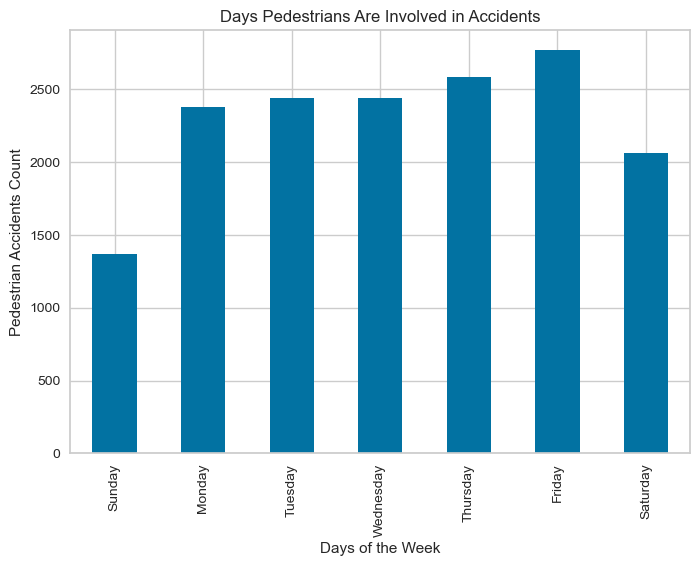

In [754]:

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax = pedestrian_df['day_of_week'].value_counts().sort_index().plot(kind='bar')
ax.set_xticklabels(weekdays)

plt.title('Days Pedestrians Are Involved in Accidents')
plt.xlabel("Days of the Week")
plt.ylabel('Pedestrian Accidents Count')

In [755]:
pedestrian_df["hour"] = pedestrian_df["datetime"].dt.hour
pedestrian_df["hour"]

0          9
1         13
2         13
3          1
4          1
          ..
220418    10
220419    17
220426    12
220429    15
220434    13
Name: hour, Length: 16010, dtype: int64

Text(0, 0.5, 'Pedestrian Accidents Count')

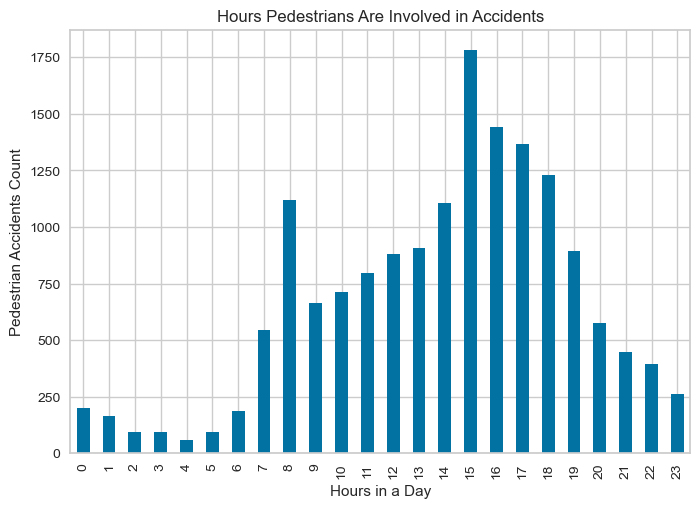

In [756]:
pedestrian_df["hour"].value_counts().sort_index().plot(kind="bar")
plt.title('Hours Pedestrians Are Involved in Accidents')
plt.xlabel("Hours in a Day")
plt.ylabel('Pedestrian Accidents Count')

Text(0, 0.5, 'Pedestrian Accident Count')

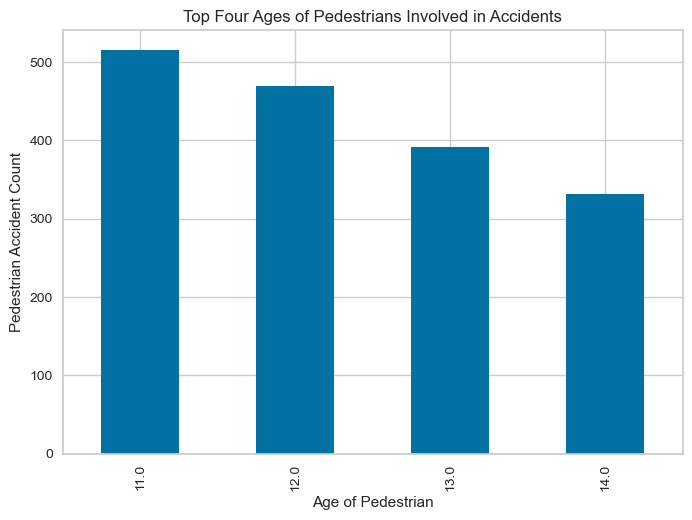

In [757]:
#Age of pedestrian most likely to be involved in an accident
pedestrian_df["age_of_casualty"].value_counts().nlargest(4).plot(kind="bar")

plt.title('Top Four Ages of Pedestrians Involved in Accidents')
plt.xlabel("Age of Pedestrian")
plt.ylabel('Pedestrian Accident Count')

### 4: Apiori Algorithm For Finding Associations


In [758]:
#Instal mlxtend which contains the Apiori Algorithm
!pip install mlxtend

In [759]:
#Import transactionencoder, apriori, and association rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [760]:
#One-Hot encode the severity column
a_severity = pd.get_dummies(avc_table.accident_severity, prefix="severity")
a_severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
220430,0,1,0
220431,0,1,0
220432,0,0,1
220433,0,0,1


In [761]:
avc_table[avc_table['weather_conditions'] ==9]

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,6.0,3,9.0,5.0,0.0,0.0,0.0,0,1.0,4.0
74,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,5.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,1.0
75,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,1,3,2,...,5.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,1.0
230,2020010228406,2020,010228406,539234.0,170792.0,0.001009,51.419050,1,3,2,...,6.0,3,0.0,0.0,1.0,0.0,0.0,9,NaN,NaN
231,2020010228406,2020,010228406,539234.0,170792.0,0.001009,51.419050,1,3,2,...,6.0,3,0.0,0.0,1.0,0.0,0.0,9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220301,2020991011410,2020,991011410,328021.0,709613.0,-3.163916,56.273505,99,3,2,...,8.0,3,0.0,0.0,0.0,0.0,0.0,19,NaN,NaN
220302,2020991011410,2020,991011410,328021.0,709613.0,-3.163916,56.273505,99,3,2,...,8.0,3,0.0,0.0,0.0,0.0,0.0,19,NaN,NaN
220382,2020991015668,2020,991015668,342463.0,732359.0,-2.935744,56.479802,99,3,2,...,5.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,8.0
220383,2020991015668,2020,991015668,342463.0,732359.0,-2.935744,56.479802,99,3,2,...,5.0,3,0.0,0.0,0.0,0.0,0.0,9,1.0,8.0


In [762]:
avc_table_clean_weather = avc_table[avc_table['weather_conditions']!=9]
avc_table_clean_weather

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1.0,3,1.0,1.0,0.0,0.0,0.0,0,1.0,2.0
2,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1.0,3,1.0,1.0,0.0,0.0,0.0,0,1.0,2.0
3,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,5.0,3,5.0,9.0,0.0,0.0,0.0,0,1.0,3.0
4,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,8.0,2,4.0,1.0,0.0,0.0,0.0,0,1.0,3.0
5,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,6.0,3,6.0,9.0,0.0,0.0,0.0,0,1.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7.0,2,0.0,0.0,0.0,0.0,0.0,5,2.0,9.0
220431,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7.0,2,0.0,0.0,0.0,0.0,0.0,5,2.0,9.0
220432,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,11.0,3,0.0,0.0,0.0,0.0,0.0,1,1.0,9.0
220433,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,11.0,3,0.0,0.0,0.0,0.0,0.0,1,1.0,9.0


In [763]:
#One-Hot encode the severity column
a_severity = pd.get_dummies(avc_table_clean_weather.accident_severity, prefix="severity")
a_severity

,severity_1,severity_2,severity_3
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,0,1
...,...,...,...
220430,0,1,0
220431,0,1,0
220432,0,0,1
220433,0,0,1


In [764]:
#One-Hot encode the weather column
a_weather = pd.get_dummies(avc_table_clean_weather.weather_conditions, prefix="weather")
a_weather

,weather_1.0,weather_2.0,weather_3.0,weather_4.0,weather_5.0,weather_6.0,weather_7.0,weather_8.0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
220430,1,0,0,0,0,0,0,0
220431,1,0,0,0,0,0,0,0
220432,1,0,0,0,0,0,0,0
220433,1,0,0,0,0,0,0,0


In [765]:
#One-Hot encode the speed column
a_speed_limit = pd.get_dummies(avc_table_clean_weather.speed_limit, prefix="speed_limit")
a_speed_limit

,speed_limit_20.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
...,...,...,...,...,...,...
220430,0,0,0,0,1,0
220431,0,0,0,0,1,0
220432,0,1,0,0,0,0
220433,0,1,0,0,0,0


In [766]:
#One-Hot encode the urban/rural area column
a_urban_rural = pd.get_dummies(avc_table_clean_weather.urban_or_rural_area, prefix="urban_rural")
a_urban_rural


,urban_rural_1,urban_rural_2,urban_rural_3
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
220430,0,1,0
220431,0,1,0
220432,1,0,0
220433,1,0,0


In [767]:
#One-Hot encode the light condition column
a_light_conditions = pd.get_dummies(avc_table_clean_weather.light_conditions, prefix="light_conditions")
a_light_conditions

,light_conditions_1.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
5,0,1,0,0,0
...,...,...,...,...,...
220430,1,0,0,0,0
220431,1,0,0,0,0
220432,1,0,0,0,0
220433,1,0,0,0,0


In [768]:
#merge the hot encoded tables into the dataframe
merged_hotdf = a_severity.join(a_speed_limit).join(a_weather).join(a_light_conditions).join(a_urban_rural)
merged_hotdf

,severity_1,severity_2,severity_3,speed_limit_20.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,weather_1.0,...,weather_7.0,weather_8.0,light_conditions_1.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,urban_rural_1,urban_rural_2,urban_rural_3
1,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
5,0,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
220431,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
220432,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
220433,0,0,1,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [769]:
#Try different support levels and see how it affects the association rules
relationship = apriori(merged_hotdf, min_support = 0.15, use_colnames = True)
relationship

,support,itemsets
0,0.205160,(severity_2)
1,0.775323,(severity_3)
2,0.540700,(speed_limit_30.0)
3,0.798541,(weather_1.0)
4,0.711746,(light_conditions_1.0)
5,0.207526,(light_conditions_4.0)
6,0.639934,(urban_rural_1)
7,0.359927,(urban_rural_2)
8,0.165047,"(severity_2, weather_1.0)"
9,0.436601,"(severity_3, speed_limit_30.0)"


In [770]:
#Generate association table to examine the various associations and relationships in the dataset
rules = association_rules(relationship, metric="support", min_threshold = 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(severity_3),(weather_1.0),0.775323,0.798541,0.617903,0.796962,0.998022,-0.001225,0.992219,-0.008746
1,(weather_1.0),(severity_3),0.798541,0.775323,0.617903,0.773789,0.998022,-0.001225,0.993219,-0.009744
2,(severity_3),(light_conditions_1.0),0.775323,0.711746,0.557860,0.719519,1.010922,0.006027,1.027716,0.048088
3,(light_conditions_1.0),(severity_3),0.711746,0.775323,0.557860,0.783792,1.010922,0.006027,1.039167,0.037482
4,(severity_3),(urban_rural_1),0.775323,0.639934,0.522265,0.673609,1.052624,0.026110,1.103176,0.222511
5,(urban_rural_1),(severity_3),0.639934,0.775323,0.522265,0.816124,1.052624,0.026110,1.221891,0.138844
6,(light_conditions_1.0),(weather_1.0),0.711746,0.798541,0.597445,0.839408,1.051176,0.029086,1.254474,0.168895
7,(weather_1.0),(light_conditions_1.0),0.798541,0.711746,0.597445,0.748170,1.051176,0.029086,1.144639,0.241662
8,(urban_rural_1),(weather_1.0),0.639934,0.798541,0.514546,0.804061,1.006912,0.003532,1.028170,0.019065
9,(weather_1.0),(urban_rural_1),0.798541,0.639934,0.514546,0.644357,1.006912,0.003532,1.012437,0.034074


In [771]:
select_severity_guide = accident_guide[accident_guide['field name'] == 'accident_severity']
select_severity_guide

,table,field name,code/format,label,note
59,Accident,accident_severity,1,Fatal,NaN
60,Accident,accident_severity,2,Serious,NaN
61,Accident,accident_severity,3,Slight,NaN


In [772]:
#Weather condition guide
select_weather_guide = accident_guide[accident_guide['field name'] == 'weather_conditions']
select_weather_guide

,table,field name,code/format,label,note
1185,Accident,weather_conditions,1,Fine no high winds,NaN
1186,Accident,weather_conditions,2,Raining no high winds,NaN
1187,Accident,weather_conditions,3,Snowing no high winds,NaN
1188,Accident,weather_conditions,4,Fine + high winds,NaN
1189,Accident,weather_conditions,5,Raining + high winds,NaN
1190,Accident,weather_conditions,6,Snowing + high winds,NaN
1191,Accident,weather_conditions,7,Fog or mist,NaN
1192,Accident,weather_conditions,8,Other,NaN
1193,Accident,weather_conditions,9,Unknown,NaN
1194,Accident,weather_conditions,-1,Data missing or out of range,NaN


In [773]:
#Speed limit guide
select_speed_guide = accident_guide[accident_guide['field name'] == 'speed_limit']
select_speed_guide

,table,field name,code/format,label,note
1135,Accident,speed_limit,NaN,NaN,"20,30,40,50,60,70 are the only valid speed lim..."
1136,Accident,speed_limit,-1,Data missing or out of range,NaN
1137,Accident,speed_limit,99,unknown (self reported),NaN


In [774]:
#light condition guide
select_light_conditions = accident_guide[accident_guide['field name'] == 'light_conditions']
select_light_conditions

,table,field name,code/format,label,note
1179,Accident,light_conditions,1,Daylight,NaN
1180,Accident,light_conditions,4,Darkness - lights lit,NaN
1181,Accident,light_conditions,5,Darkness - lights unlit,NaN
1182,Accident,light_conditions,6,Darkness - no lighting,NaN
1183,Accident,light_conditions,7,Darkness - lighting unknown,NaN
1184,Accident,light_conditions,-1,Data missing or out of range,NaN


In [775]:
#Urban/Rural guide
urban_rural_code = accident_guide[accident_guide['field name'] == 'urban_or_rural_area']
urban_rural_code

,table,field name,code/format,label,note
1224,Accident,urban_or_rural_area,1,Urban,field introduced in 1994
1225,Accident,urban_or_rural_area,2,Rural,field introduced in 1994
1226,Accident,urban_or_rural_area,3,Unallocated,field introduced in 1994
1227,Accident,urban_or_rural_area,-1,Data missing or out of range,field introduced in 1994


### No 5: Accident in Hull, Humberside, and East Riding of Yorkshire

In [776]:
acc_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [777]:
avc_lsoa_table = pd.merge(avc_table, acc_lsoa, left_on='lsoa_of_accident_location', right_on='lsoa01cd')
avc_lsoa_table

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,0,1.0,4.0,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
1,2020010240428,2020,010240428,521357.0,174350.0,-0.254734,51.455133,1,2,2,...,1,1.0,8.0,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
2,2020010240428,2020,010240428,521357.0,174350.0,-0.254734,51.455133,1,2,2,...,1,1.0,8.0,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
3,2020010249713,2020,010249713,521564.0,174913.0,-0.251563,51.460148,1,3,2,...,1,1.0,4.0,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
4,2020010249713,2020,010249713,521564.0,174913.0,-0.251563,51.460148,1,3,2,...,1,1.0,4.0,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,202063D085620,2020,63D085620,295530.0,284080.0,-3.538477,52.444677,63,2,2,...,9,1.0,5.0,32948,W01000466,Powys 010C,Powys 010C,1.747211e+06,7827.411516,f029128c-ebb5-44ba-ab93-7ddd81d59d04
201939,202063D085620,2020,63D085620,295530.0,284080.0,-3.538477,52.444677,63,2,2,...,9,1.0,5.0,32948,W01000466,Powys 010C,Powys 010C,1.747211e+06,7827.411516,f029128c-ebb5-44ba-ab93-7ddd81d59d04
201940,202063D085620,2020,63D085620,295530.0,284080.0,-3.538477,52.444677,63,2,2,...,9,1.0,5.0,32948,W01000466,Powys 010C,Powys 010C,1.747211e+06,7827.411516,f029128c-ebb5-44ba-ab93-7ddd81d59d04
201941,202063D086520,2020,63D086520,310980.0,291900.0,-3.313323,52.517700,63,2,2,...,90,1.0,9.0,32963,W01000481,Powys 008B,Powys 008B,7.044616e+06,13558.849188,2ef1558e-c2e5-44f8-8578-2f27b9d3fcdc


In [778]:
#Filter accident in the regions of Kingston Upon Hull

hull_side_table = avc_lsoa_table.loc[(avc_lsoa_table['lsoa01nmw'].str.contains('Kingston upon Hull', case= False))\
                                    | (avc_lsoa_table['lsoa01nmw'].str.contains('East Riding of Yorkshire', case=False))|\
                                    (avc_lsoa_table['lsoa01nmw'].str.contains('Humberside', case=False))]
hull_side_table

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,casualty_type,casualty_home_area_type,casualty_imd_decile,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
83493,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,9,3.0,6.0,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
83494,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,9,3.0,6.0,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
83495,2020160918418,2020,160918418,505576.0,428756.0,-0.400627,53.744520,16,3,2,...,1,1.0,5.0,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
83496,2020160918418,2020,160918418,505576.0,428756.0,-0.400627,53.744520,16,3,2,...,1,1.0,5.0,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
83497,2020160936879,2020,160936879,505583.0,428752.0,-0.400523,53.744482,16,3,2,...,1,1.0,10.0,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87473,2020161012614,2020,161012614,504795.0,439763.0,-0.408728,53.843568,16,3,5,...,9,1.0,3.0,13037,E01013037,East Riding of Yorkshire 019B,East Riding of Yorkshire 019B,2.577429e+06,11349.306536,e3117ff6-de67-45f4-8ccd-9608fbacd93e
87474,2020161012614,2020,161012614,504795.0,439763.0,-0.408728,53.843568,16,3,5,...,9,1.0,3.0,13037,E01013037,East Riding of Yorkshire 019B,East Riding of Yorkshire 019B,2.577429e+06,11349.306536,e3117ff6-de67-45f4-8ccd-9608fbacd93e
87475,2020161012614,2020,161012614,504795.0,439763.0,-0.408728,53.843568,16,3,5,...,9,1.0,3.0,13037,E01013037,East Riding of Yorkshire 019B,East Riding of Yorkshire 019B,2.577429e+06,11349.306536,e3117ff6-de67-45f4-8ccd-9608fbacd93e
87476,2020161012744,2020,161012744,503718.0,428641.0,-0.428826,53.743858,16,3,2,...,1,1.0,5.0,13107,E01013107,East Riding of Yorkshire 034E,East Riding of Yorkshire 034E,7.226835e+05,5478.942896,98f2a23f-8a71-4af2-a948-a3c9c22a896a


In [779]:
#Filter out the longitude and latitude for hull side 
hull_lon_lat = hull_side_table[['longitude', 'latitude']]
hull_lon_lat

,longitude,latitude
83493,-0.393424,53.744936
83494,-0.393424,53.744936
83495,-0.400627,53.744520
83496,-0.400627,53.744520
83497,-0.400523,53.744482
...,...,...
87473,-0.408728,53.843568
87474,-0.408728,53.843568
87475,-0.408728,53.843568
87476,-0.428826,53.743858


In [780]:
#Scale longitude and latitude data to standardize the value
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_lat_long = scale.fit_transform(hull_lon_lat)

In [781]:
#Import Kmeans for clustering and use randaom cluster of ten
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_lat_long)
#kmeans.inertia_
kmeans.labels_

array([3, 3, 3, ..., 7, 3, 3])

In [782]:
labels = kmeans.predict(scaled_lat_long)
centroid = kmeans.cluster_centers_
#centroid

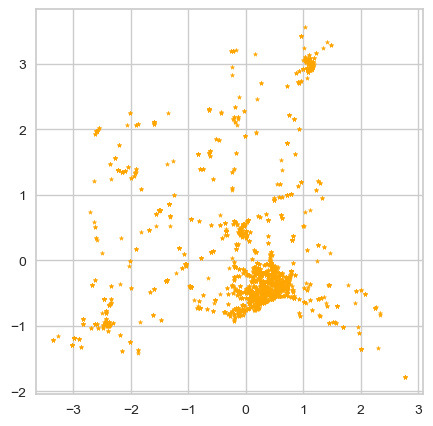

In [783]:
fig = plt.figure(figsize=(5,5))
colmap = {1: 'r', 2: 'b', 3: 'gray', 4: 'k'}
#colors = list(map(lambda x: colmap[x + 1], labels))
plt.scatter(scaled_lat_long[:,0], scaled_lat_long[:,1], marker="*", color="Orange", s=10)

#plt.scatter(centroid[:, 0], centroid[:, 1], marker="*", color="Orange", s=200, s=200)


In [784]:
scaled_lat_long

array([[ 0.09221842, -0.57040293],
       [ 0.09221842, -0.57040293],
       [ 0.05480492, -0.57471631],
       ...,
       [ 0.01272708,  0.45228287],
       [-0.09166503, -0.58158039],
       [-0.09166503, -0.58158039]])

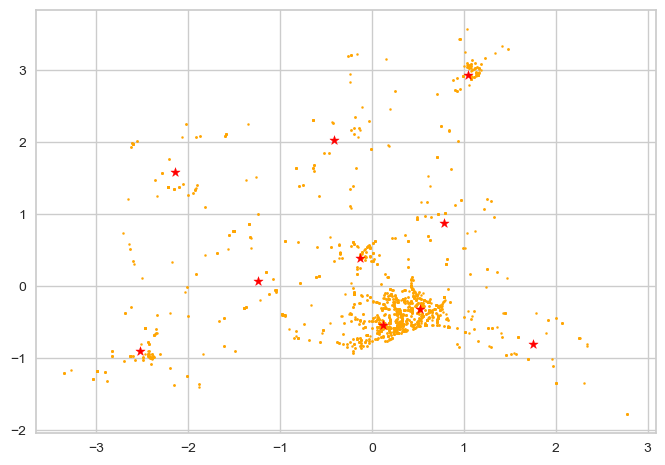

In [785]:
plt.scatter(scaled_lat_long[:,0], scaled_lat_long[:,1], color="Orange", s=2)

plt.scatter(centroid[:,0], centroid[:,1],  marker="*", color="red")


In [786]:
from PIL import Image

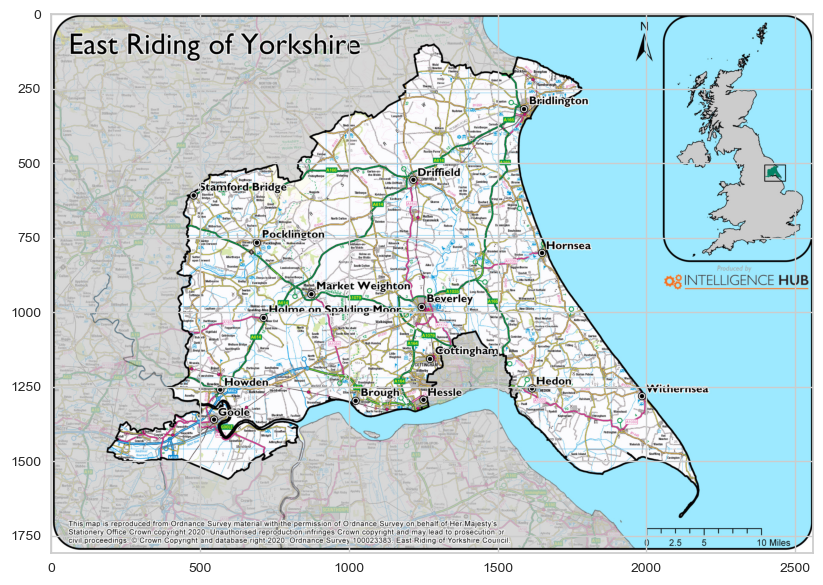

In [787]:
plt.figure(figsize=(10,7))
img=Image.open('East-Riding-OS-scaled.jpg')
plt.imshow(img)



In [788]:
#Determine optimal number of clusters with elbow method
#Source: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(scaled_lat_long)
    kmeanModel.fit(scaled_lat_long)
 
    distortions.append(sum(np.min(cdist(scaled_lat_long, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_lat_long.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(scaled_lat_long, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_lat_long.shape[0]
    mapping2[k] = kmeanModel.inertia_

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1.1047977391374848
2 : 0.8372073690967551
3 : 0.6068724186770841
4 : 0.5181575290016144
5 : 0.4474389785096906
6 : 0.41070372996643956
7 : 0.382058068737347
8 : 0.3506040365488385
9 : 0.30764295642114864


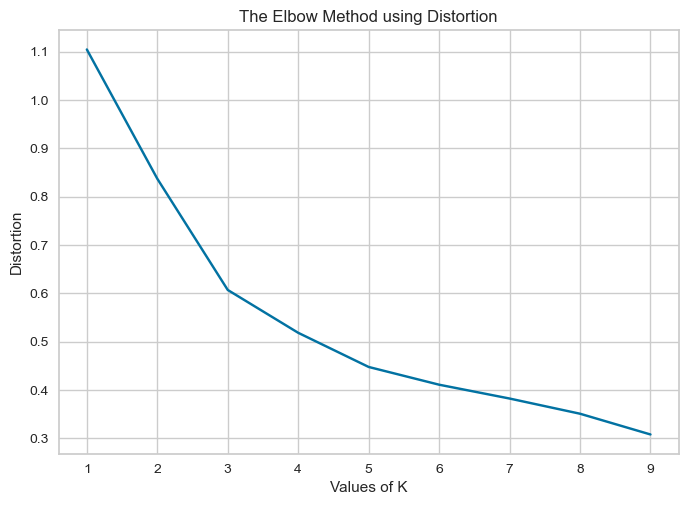

In [789]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [790]:
#Use four as cluster as determined by the elbow method
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_lat_long)
#kmeans.inertia_
kmeans.labels_

array([0, 0, 0, ..., 4, 0, 0])

In [791]:
labels = kmeans.predict(scaled_lat_long)
centroid = kmeans.cluster_centers_
#centroid

Text(0, 0.5, 'Longitutude')

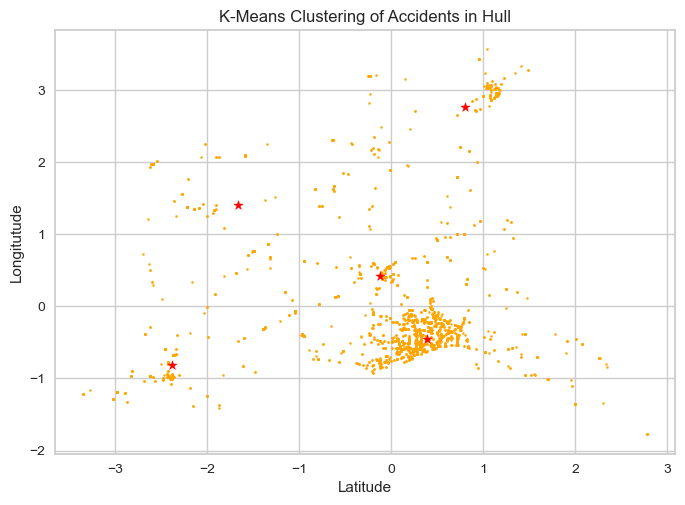

In [792]:
plt.scatter(scaled_lat_long[:,0], scaled_lat_long[:,1], color="Orange", s=2)

plt.scatter(centroid[:,0], centroid[:,1],  marker="*", color="red")
plt.title("K-Means Clustering of Accidents in Hull")
plt.xlabel("Latitude")
plt.ylabel("Longitutude")


In [793]:
#Try Kmedoid for clustering 
#First instal the module
!pip install scikit-learn-extra


In [794]:
#Import KMedoids
from sklearn_extra.cluster import KMedoids

In [795]:
kmed = KMedoids(n_clusters = 5)
kmed.fit(scaled_lat_long)

KMedoids(n_clusters=5)

In [796]:
pred_mediod = kmed.predict(scaled_lat_long)
kmediod_centroid = kmed.cluster_centers_

Text(0, 0.5, 'Longitutude')

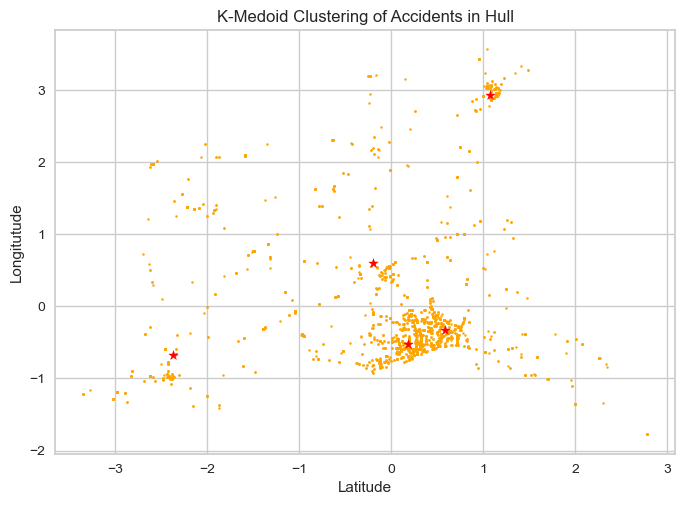

In [797]:
plt.scatter(scaled_lat_long[:,0], scaled_lat_long[:,1], color="Orange", s=2)

plt.scatter(kmediod_centroid[:,0], kmediod_centroid[:,1],  marker="*", color="red")
plt.title("K-Medoid Clustering of Accidents in Hull")
plt.xlabel("Latitude")
plt.ylabel("Longitutude")

### 6: Finding Outliers in the Dataset

<AxesSubplot:xlabel='age_of_driver', ylabel='Count'>

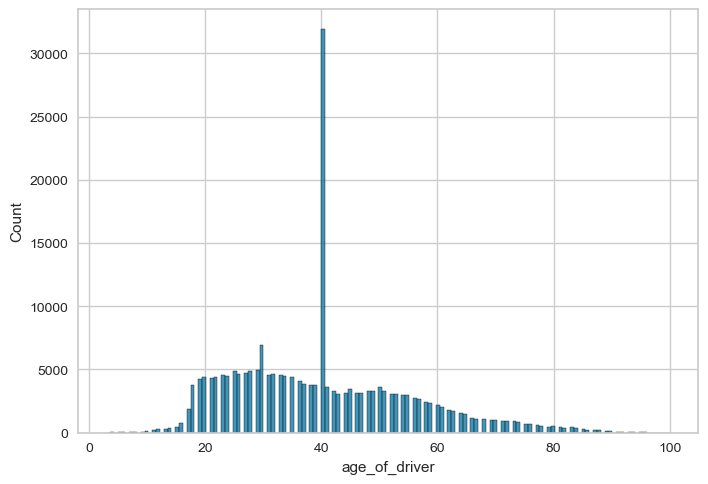

In [798]:
#Use histogram to visualize the distribution of some of the continuous variables to observe any possible outlier
sns.histplot(avc_table['age_of_driver'])

<AxesSubplot:xlabel='age_of_vehicle', ylabel='Count'>

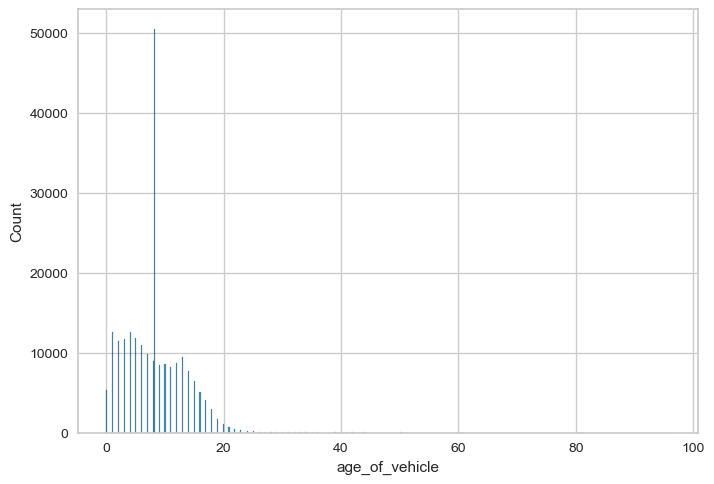

In [799]:
#Use histogram to visualize the distribution of some of the continuous variables to observe any possible outlier
sns.histplot(avc_table['age_of_vehicle'])

In [800]:
#Use Interquatile Range to detect potential Outliers
dage_q75, dage_q25 = np.percentile(avc_table['age_of_driver'], [75, 25])
dage_iqr = dage_q75 - dage_q25
print(dage_iqr)

20.0


In [801]:
#Print the outlier boundaries based on the interquatile range
print(dage_q25-1.5*dage_iqr, dage_q75+1.5 * dage_iqr)

-1.0 79.0


In [802]:
driver_iqfilter = avc_table.loc[(avc_table['age_of_driver'] < -1) | (avc_table['age_of_driver'] >79)]
driver_iqfilter['age_of_driver']

87        81.0
136       88.0
224       80.0
355       85.0
356       85.0
          ... 
220019    83.0
220252    86.0
220253    86.0
220335    83.0
220388    87.0
Name: age_of_driver, Length: 3509, dtype: float64

In [803]:
#Use Interquatile Range to detect potential Outliers
vage_q75, vage_q25 = np.percentile(avc_table['age_of_vehicle'], [75, 25])
vage_iqr = vage_q75 - vage_q25
print(vage_iqr)

6.0


In [804]:
#Print the outlier boundaries based on the interquatile range
print(vage_q25-1.5*vage_iqr, vage_q75+1.5 * vage_iqr)

-4.0 20.0


In [805]:
vehicle_iqfilter = avc_table.loc[(avc_table['age_of_vehicle'] < -4) | (avc_table['age_of_vehicle'] >20)]
vehicle_iqfilter['age_of_vehicle'].nlargest(10)
# .plot(kind='bar')
# # plt.title('Top 10 Oldest Vehicle Involved in Accident')
# # plt.ylabel('Age of Vehicle')
# # plt.xlabel('ID of Vehicle')

188472    96.0
217536    93.0
80544     92.0
90389     88.0
190607    88.0
65536     86.0
183221    86.0
126590    84.0
160299    78.0
190000    68.0
Name: age_of_vehicle, dtype: float64

In [806]:
#Multivariate outlier detection
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile,where

In [807]:
#Using the longitude and latitude data
long_lat_df = avc_table[['longitude', 'latitude']]
long_lat_df['longitude'] = long_lat_df['longitude'].fillna(long_lat_df['longitude'].mode()[0])
long_lat_df['latitude'] = long_lat_df['latitude'].fillna(long_lat_df['latitude'].mode()[0])
# #long_lat_drop = long_lat_df.dropna()
# #long_lat_drop.isna().sum()
long_lat_df.isna().sum()

longitude    0
latitude     0
dtype: int64

In [808]:
#We don't have to input the contamination, we could just 
#use n_neighbors in the following line:-
model = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = model.fit_predict(long_lat_df)
LOF_Scores = model.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies= long_lat_df[LOF_pred==1]

Text(0, 0.5, 'Longitutude')

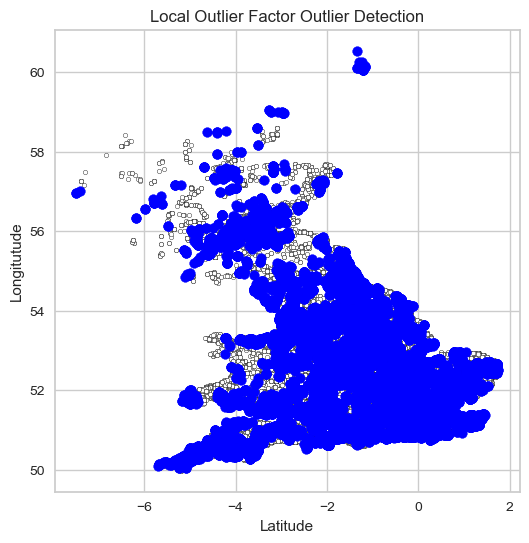

In [809]:
#Plot the the data and outliers to visualize the outliers(blue colour)
plt.figure(figsize=(6,6))
plt.scatter(long_lat_df['longitude'],long_lat_df['latitude'],c='white',s=10,edgecolor='k')
plt.scatter(LOF_anomalies['longitude'],LOF_anomalies['latitude'],c='blue')
plt.title('Local Outlier Factor Outlier Detection')
plt.xlabel("Latitude")
plt.ylabel("Longitutude")

In [810]:
from sklearn.ensemble import IsolationForest

In [811]:
ranst=np.random.RandomState(0)

model = IsolationForest(max_samples=100,random_state=ranst, contamination=.05) 
model.fit(long_lat_df)
if_scores = model.decision_function(long_lat_df)
if_anomalies=model.predict(long_lat_df)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=long_lat_df[if_anomalies==1];

In [812]:
if_anomalies

,longitude,latitude
186256,-4.758562,50.437631
186257,-4.758562,50.437631
186258,-4.758562,50.437631
186259,-4.758562,50.437631
186260,-4.758562,50.437631
...,...,...
220430,-2.271903,57.186317
220431,-2.271903,57.186317
220432,-3.968753,55.950940
220433,-3.968753,55.950940


Text(0, 0.5, 'Longitutude')

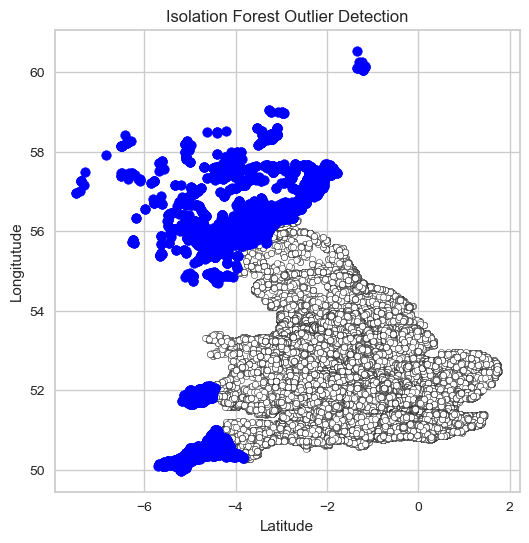

In [813]:
plt.figure(figsize=(6,6))
plt.scatter(long_lat_df['longitude'],long_lat_df['latitude'],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies['longitude'],if_anomalies['latitude'],c='blue')
plt.title('Isolation Forest Outlier Detection')
plt.xlabel("Latitude")
plt.ylabel("Longitutude")

### No 7: Model To Predict Fata Accident

In [814]:
#Find What Accident Severity Equals Fatal from the guide
select_severity_guide

,table,field name,code/format,label,note
59,Accident,accident_severity,1,Fatal,NaN
60,Accident,accident_severity,2,Serious,NaN
61,Accident,accident_severity,3,Slight,NaN


In [815]:
#Create a label With True for Fatal and False for non fatal
y_fatal = accident_df['accident_severity']==1

In [816]:
y_fatal

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Name: accident_severity, Length: 91199, dtype: bool

In [817]:
#Compare the number of true and false labels
y_fatal.value_counts()

False    89808
True      1391
Name: accident_severity, dtype: int64

In [818]:
#Given the much fewer "True" values, the data needs to be balanced
# I will use the imbalanced package to balance the data
#Install the imbalanced package
!pip install imbalanced-learn

In [819]:
#import randomundersampler from the imbalanced package to randomly remove samples from the majority class
from imblearn.under_sampling import RandomUnderSampler

In [820]:
#Use RandomSampler to create a balanced sample referencing the original dataframe
balanced_df, y_balanced = RandomUnderSampler().fit_resample(accident_df, y_fatal)
#Confirm the sample is now balanced
y_balanced.value_counts()

False    1391
True     1391
Name: accident_severity, dtype: int64

In [821]:
#remove severity column we are trying to predict and police officer attending the scene as police normally show up for fatal acciden
balance_drop_police_sev = balanced_df.drop(columns= ['accident_severity', 'did_police_officer_attend_scene_of_accident'])

In [822]:
#Select only numeric variable from the balanced dataframe
balanced_df_numeric = balance_drop_police_sev.select_dtypes([np.number])

In [823]:
#Visualize columns with na in the dataset
balanced_df_numeric.isna().sum().nlargest(15)

junction_control            1488
second_road_number          1481
trunk_road_flag              313
accident_year                  0
location_easting_osgr          0
location_northing_osgr         0
longitude                      0
latitude                       0
police_force                   0
number_of_vehicles             0
number_of_casualties           0
day_of_week                    0
local_authority_district       0
first_road_class               0
first_road_number              0
dtype: int64

In [824]:
balanced_df_numeric['junction_control'] = balanced_df_numeric['junction_control'].fillna(balanced_df_numeric['junction_control'].mode()[0])
balanced_df_numeric['second_road_number'] = balanced_df_numeric['second_road_number'].fillna(balanced_df_numeric['second_road_number'].mode()[0])
balanced_df_numeric['trunk_road_flag'] = balanced_df_numeric['trunk_road_flag'].fillna(balanced_df_numeric['trunk_road_flag'].mode()[0])

In [825]:
#Visualize columns with na in the dataset
balanced_df_numeric.isna().sum().nlargest(15)

accident_year               0
location_easting_osgr       0
location_northing_osgr      0
longitude                   0
latitude                    0
police_force                0
number_of_vehicles          0
number_of_casualties        0
day_of_week                 0
local_authority_district    0
first_road_class            0
first_road_number           0
road_type                   0
speed_limit                 0
junction_detail             0
dtype: int64

In [826]:
balanced_drop

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,hour
7842,2020,521186.0,178914.0,-0.255630,51.496188,1,2,1,2,27.0,...,9.0,9.0,1.0,1.0,1.0,9.0,9.0,1,2.0,14
58250,2020,509154.0,221108.0,-0.415697,51.877874,40,1,1,6,421.0,...,0.0,0.0,1.0,8.0,2.0,0.0,0.0,1,2.0,10
18546,2020,538231.0,181111.0,-0.009374,51.512024,1,2,1,3,5.0,...,0.0,0.0,7.0,4.0,1.0,0.0,0.0,1,2.0,17
10301,2020,535448.0,183682.0,-0.048466,51.535801,1,2,1,6,4.0,...,9.0,9.0,4.0,8.0,9.0,0.0,0.0,1,2.0,21
88254,2020,258361.0,660572.0,-4.262096,55.817562,99,1,1,5,926.0,...,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1,2.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90965,2020,254367.0,661245.0,-4.326142,55.822415,99,1,1,2,926.0,...,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1,2.0,17
91047,2020,270790.0,659812.0,-4.063523,55.814225,99,2,1,2,938.0,...,0.0,0.0,6.0,1.0,2.0,0.0,0.0,1,2.0,18
91078,2020,113410.0,903322.0,-6.842655,57.926736,99,1,1,5,941.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,9
91089,2020,381609.0,654146.0,-2.294786,55.780278,99,2,1,6,914.0,...,0.0,0.0,1.0,1.0,2.0,0.0,0.0,2,2.0,10


In [827]:
#Too many features. Use SelectkBest to find best features
from sklearn.feature_selection import SelectKBest, f_classif

In [828]:
# Select best 10 features to use for classification
selector = SelectKBest(f_classif, k=10)
selector.fit(balanced_drop, y_balanced)

SelectKBest()

In [829]:
#Get the names and scores of the top features for prediction
mask = selector.get_support()
names = selector.feature_names_in_[mask]
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

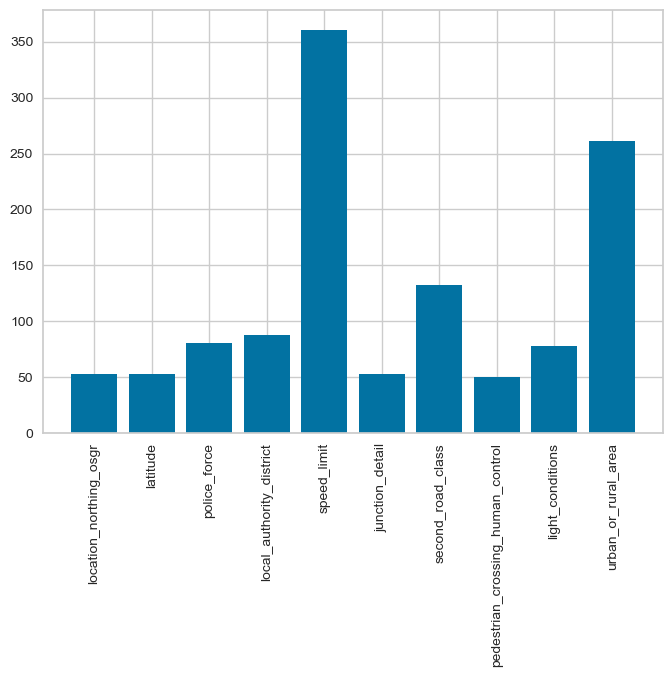

In [830]:
#Highlight the top ten best predictors
plt.bar(names, scores)
plt.xticks(rotation='vertical')

In [831]:
#Import train test split to split data for training
from sklearn.model_selection import train_test_split

In [832]:
# Split data into test and train set
X_train, X_test, y_train, y_test = train_test_split(balanced_df_numeric, y_balanced, test_size=0.30, random_state=42)

In [833]:
#Import Decision Treee Classifier
from sklearn.tree import DecisionTreeClassifier

In [834]:
#Create a decision tree classifier
dtree = DecisionTreeClassifier(min_samples_leaf=100)

In [835]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=100)

In [836]:
Y_pred = dtree.predict(X_test)

In [837]:
acc_dtree = round(dtree.score(X_train, y_train) * 100,
                 2)

### Evaluate the Classifier

In [838]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

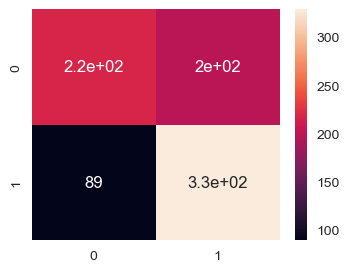

In [839]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, Y_pred), 
            annot=True)

In [840]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

       False       0.71      0.52      0.60       417
        True       0.62      0.79      0.70       418

    accuracy                           0.66       835
   macro avg       0.67      0.65      0.65       835
weighted avg       0.67      0.66      0.65       835



In [841]:
df_importance = pd.DataFrame(np.array([dtree.feature_names_in_, 
                                       dtree.feature_importances_]
                                     ).T,
                             columns=["Feature", "Importance"]
                            )

In [842]:
df_importance.sort_values("Importance", ascending=False)

,Feature,Importance
13,speed_limit,0.451054
6,number_of_vehicles,0.312929
9,local_authority_district,0.053778
1,location_easting_osgr,0.053622
20,light_conditions,0.044036
12,road_type,0.029972
11,first_road_number,0.028208
25,urban_or_rural_area,0.013179
4,latitude,0.009488
2,location_northing_osgr,0.003734


In [843]:
##Use Cross Validation to evaluate the predictive performance of the model
#Import Cross Validator and metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [844]:
result_tree = cross_validate(dtree, X_train, y_train, cv=10, scoring='accuracy', return_estimator=True)
print(result_tree['test_score'])

[0.69230769 0.71282051 0.63076923 0.74358974 0.64102564 0.63076923
 0.61538462 0.69072165 0.72164948 0.68041237]


In [845]:
accuracy_mean = result_tree['test_score'].mean()
std_accuracy = np.std(result_tree['test_score'])

print(f"Mean of Accuracy: {accuracy_mean}")

print(f"Standard Deviation of Accuracy: {std_accuracy}")

Mean of Accuracy: 0.6759450171821306
Standard Deviation of Accuracy: 0.04183202269712168


In [846]:
#Import the required metrics from SKlearn
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score

#Create a dictionary with the required metrics in the dictionary 
scorer = {'accuracy': make_scorer(accuracy_score),
         'precision': make_scorer(precision_score, average='macro'),
         'recall': make_scorer(recall_score, average='macro'),
         'f1': make_scorer(f1_score, average='macro')}
#Perform crossvalidation on the decision tree classifier

results_tree2 = cross_validate(dtree, X_train, y_train, cv=10, scoring=scorer, return_estimator=True)

#Print result 

for metric in scorer.keys():
    metric_values = results_tree2[f"test_{metric}"]
    print(f"{metric}:\n Values: {metric_values}\n Mean:{np.mean(metric_values)}\n Standard Deviation: {np.std(metric_values)}")

accuracy:
 Values: [0.69230769 0.71794872 0.63076923 0.74358974 0.64102564 0.63076923
 0.61538462 0.69072165 0.72164948 0.68041237]
 Mean:0.676457837694951
 Standard Deviation: 0.04230964438523917
precision:
 Values: [0.70971429 0.73332585 0.63559783 0.75663423 0.6438253  0.63075952
 0.61607143 0.69202782 0.7417971  0.68684645]
 Mean:0.6846599816270778
 Standard Deviation: 0.04815008747988051
recall:
 Values: [0.69303598 0.71859878 0.63123291 0.74416158 0.64064801 0.63075952
 0.61555859 0.69072165 0.72164948 0.68041237]
 Mean:0.6766778876499053
 Standard Deviation: 0.04245006272463627
f1:
 Values: [0.68629344 0.71361051 0.62794149 0.7405811  0.63888889 0.63075952
 0.61502014 0.69019483 0.71572778 0.67763722]
 Mean:0.6736654902933499
 Standard Deviation: 0.0410746804595774


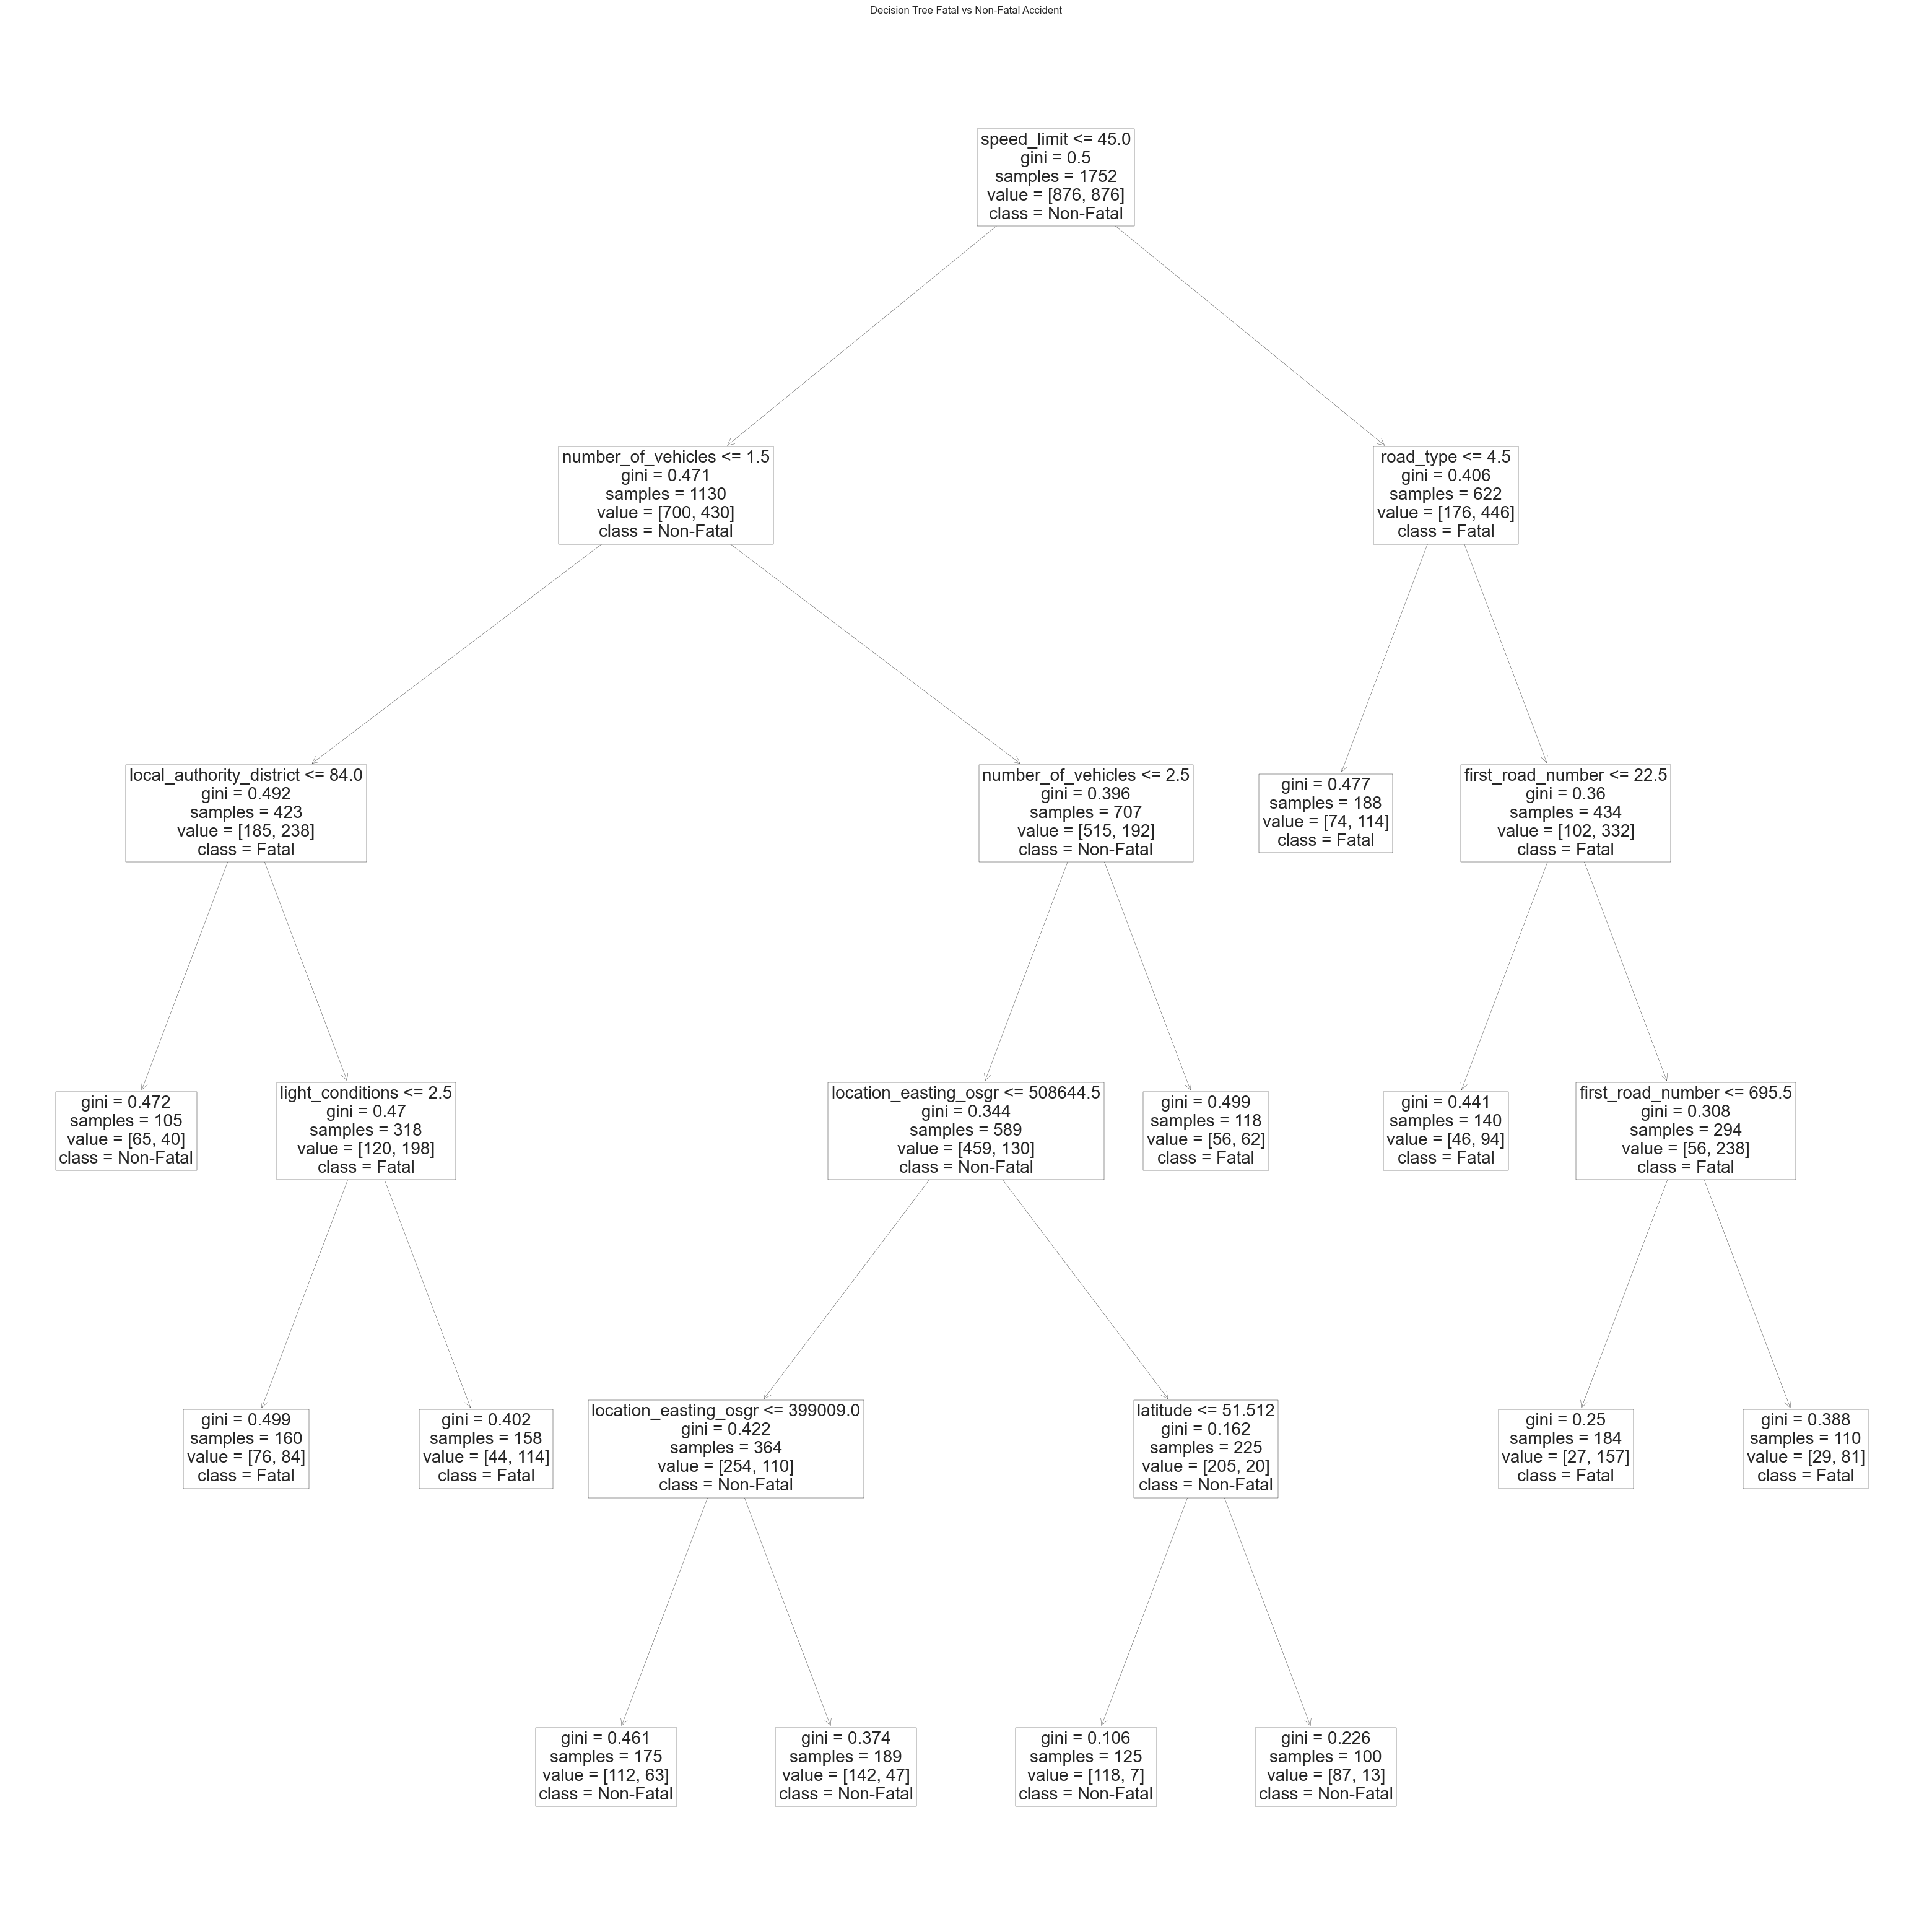

In [847]:
from sklearn import tree
plt.figure(figsize=(40,40))
tree.plot_tree(result_tree["estimator"][0], feature_names=result_tree["estimator"][0].feature_names_in_,
         class_names=["Non-Fatal", "Fatal"],
         fontsize=20)
plt.title("Decision Tree Fatal vs Non-Fatal Accident")
plt.savefig("decision tree classifier.png")

In [848]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from  sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [849]:
def get_models():
    models = dict()
    models["dtree"] = DecisionTreeClassifier()
    models["bayes"] = GaussianNB()
    models["rforest"] = RandomForestClassifier()
    return models

In [850]:
def evaluate_model(model, X, Y):
    """
    Evaluate a model
    """
    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #get scores
    scores = cross_val_score(model, X_train,y_train, scoring="accuracy", cv=cv, error_score='raise')
    return scores

In [851]:
import warnings
warnings.filterwarnings("ignore")
models = get_models()
names = []
results = []
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(f"{name}: {np.mean(scores):3.2f} {np.std(scores):4.3f}")

    warnings.filterwarnings('default')

dtree: 0.61 0.040
bayes: 0.63 0.029
rforest: 0.69 0.025


In [852]:
def get_stacking():
    """
    Create a Stacking Classifier
    """
    leve10 = []
    leve10.append(("dtree", DecisionTreeClassifier()))
    leve10.append(("bayes", GaussianNB()))
    leve10.append(("rforest", RandomForestClassifier()))
    
    leve11 = LogisticRegression()
    
    model = StackingClassifier(estimators=leve10, final_estimator=leve11, cv=5, )
    return model

In [853]:
def get_models():
    models = dict()
    models["dtree"] = DecisionTreeClassifier()
    models["bayes"] = GaussianNB()
    models["rforest"] = RandomForestClassifier()
    models["Stacking"] = get_stacking()
    return models

In [854]:
import warnings
warnings.filterwarnings("ignore")
models = get_models()
names = []
results = []
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(f"{name}: {np.mean(scores):3.2f} {np.std(scores):4.3f}")

    warnings.filterwarnings('default')

dtree: 0.61 0.035
bayes: 0.63 0.029
rforest: 0.69 0.027
Stacking: 0.70 0.025


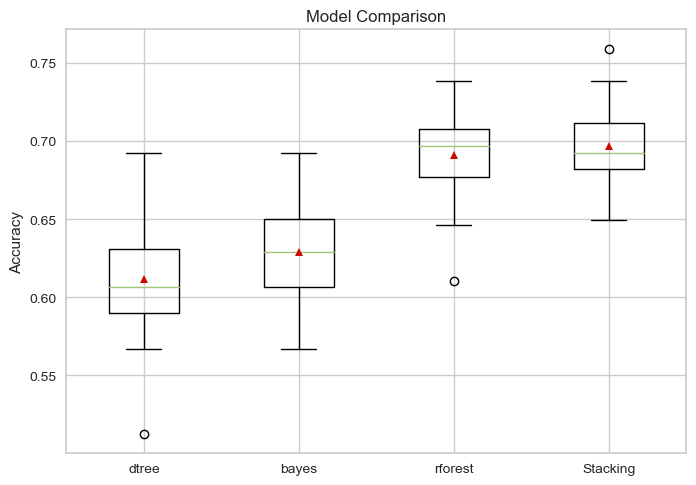

In [855]:
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()